<a href="https://colab.research.google.com/github/annykay/NoiseInDataImpact/blob/main/MissingFeaturesAndImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = pd.read_csv('Pulsars_features.csv', index_col= 0)
y = pd.read_csv('Pulsars_labels.csv', index_col = 0)

tree = DecisionTreeClassifier(random_state=0, max_depth = 2)
forst = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth= 7,  n_estimators = 10, max_features = 6)
ada = AdaBoostClassifier(learning_rate= 0.6, n_estimators=50)
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs=-1)
xgvClf = xgb.XGBClassifier(random_state=0, learning_rate=0.3, max_depth = 3, n_estimators=70, )
logReg = LogisticRegression(random_state=0, C=12, n_jobs = -1)

clfs = [tree,
        forst, 
        knn,
        xgvClf,
        logReg
       ]


def Scores(clfs, X_train, X_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    importances = []
    for reg in clfs:

        reg.fit(X_train, y_train)
        y_train_pred = reg.predict(X_train)

        y_test_pred = reg.predict(X_test)
        train_score = round(f1_score(y_train, y_train_pred, average='micro'), 2)
        test_score = round(f1_score(y_test, y_test_pred, average='micro'), 2)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

def corupt_data(n, X, y, clfs, est):
    Train_Scores = []
    Test_Scores = []
    for i in range(n):
        level = i/n
        print(level)
        D = X.copy()
        imp = IterativeImputer(estimator = est, max_iter=3, random_state=0)
        mask = np.random.binomial(1, level, size=(D.shape[0],D.shape[1])).astype(bool)
        D[mask] = np.nan
        X_train, X_test, y_train, y_test = train_test_split(
             D, y, test_size=0.7, random_state=0)
    
        imp.fit(X_train)
        X_train = imp.transform(X_train)
        X_test = imp.transform(X_test)
    
        scores = Scores(clfs, X_train, X_test, y_train, y_test)
        print(scores)
    
        Train_Scores.append(scores[0])
        Test_Scores.append(scores[1])
        
    return (Train_Scores, Test_Scores)
pulsar_train, pulsar_test = corupt_data(20, X, y, clfs, est = None)

0.0
[14:54:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.05
[14:54:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.98, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.1
[14:54:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.15
[14:54:23] WARNING: ../src/lear

In [ ]:
pd.DataFrame(pulsar_train).to_csv('PulsarF1TrainScores.csv', index = False)
pd.DataFrame(pulsar_test).to_csv('PulsarF1TestScores.csv', index = False)

In [ ]:
def plot_results(result, datasetname, inputation, test = True):
    plt.figure(figsize=(10,8))
    plt.plot([i/20 for i in range(20)], np.array(result)[:,0], label = 'DTC')
    plt.plot([i/20 for i in range(20)], np.array(result)[:,1], label = 'RFC')
    plt.plot([i/20 for i in range(20)], np.array(result)[:,2], label = 'KNN')
    plt.plot([i/20 for i in range(20)], np.array(result)[:,3], label = 'XGB')
    plt.plot([i/20 for i in range(20)], np.array(result)[:,4], label = 'LRC')
    if test:
        plt.title('{} DataSet(Test). Feature Corruption. {} Imputation'.format(datasetname, inputation))
    else:
        plt.title('{} DataSet(Train). Feature Corruption. {} Imputation'.format(datasetname, inputation))
    plt.xlabel('Drop Level')
    plt.ylabel('F1 score')
    plt.grid()
    plt.legend()
    plt.show()

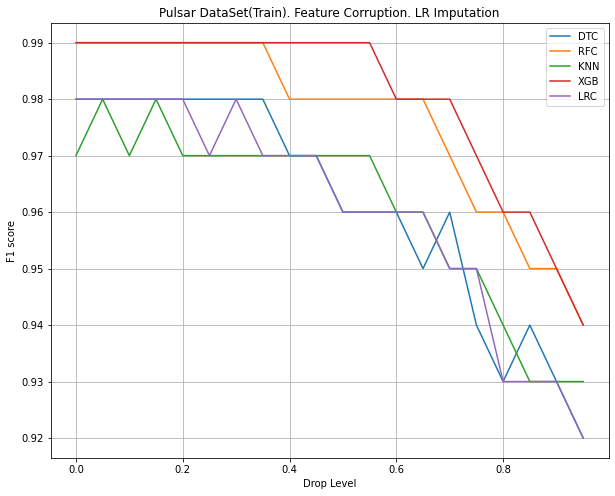

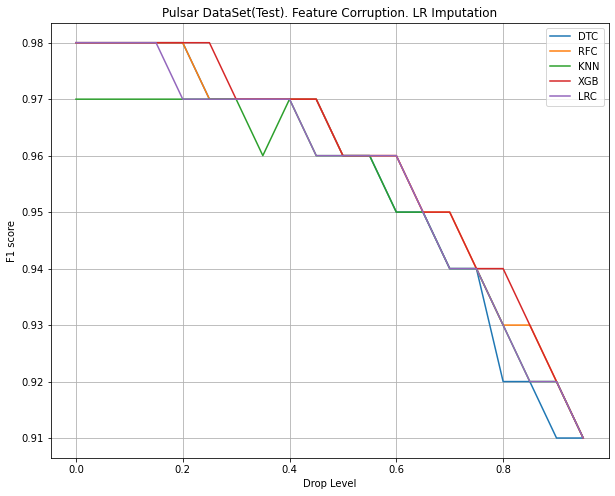

In [ ]:
plot_results(pulsar_train, 'Pulsar', 'LR', test = False)
plot_results(pulsar_test, 'Pulsar', 'LR', test = True)

In [ ]:
pulsar_train_forest, pulsar_test_forest = corupt_data(20, X, y, clfs, est = DecisionTreeRegressor())

0.0
[14:54:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.05
[14:54:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.1
[14:54:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.15
[14:54:36] WARNING: ../src/lear

In [ ]:
pd.DataFrame(pulsar_train_forest).to_csv('PulsarF1TrainScoresDT.csv', index = False)
pd.DataFrame(pulsar_test_forest).to_csv('PulsarF1TestScoresDT.csv', index = False)

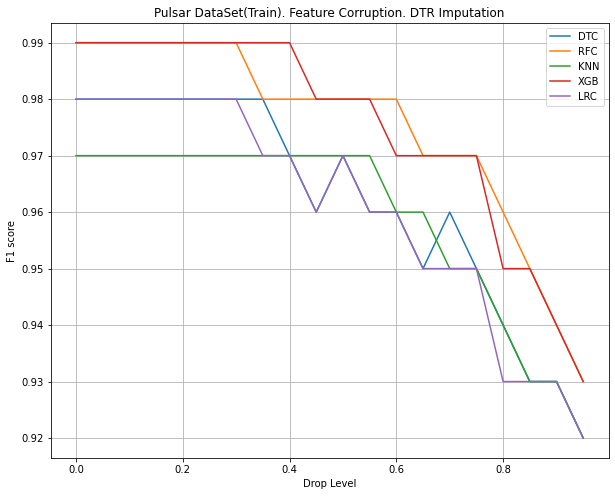

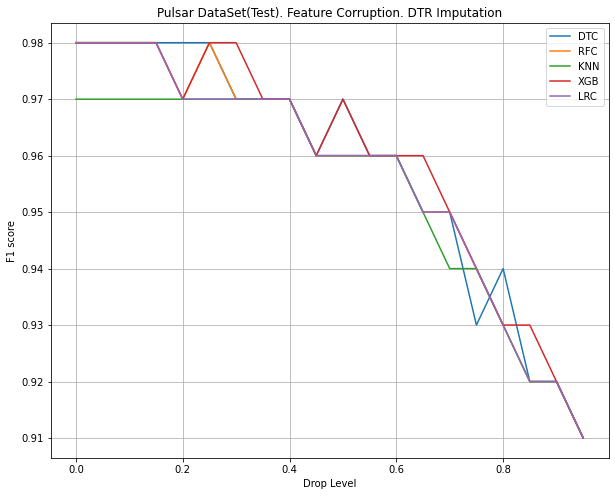

In [ ]:
plot_results(pulsar_train_forest, 'Pulsar', 'DTR', test = False)
plot_results(pulsar_test_forest, 'Pulsar', 'DTR', test = True)

In [ ]:
pulsar_train_knn, pulsar_test_knn = corupt_data(20, X, y, clfs, est = KNeighborsRegressor())

0.0
[14:54:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.05
[14:54:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.98, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.1
[14:54:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.15
[14:54:49] WARNING: ../src/lear

In [ ]:

pd.DataFrame(pulsar_train_knn).to_csv('PulsarF1TrainScoresKNN.csv', index = False)
pd.DataFrame(pulsar_test_knn).to_csv('PulsarF1TestScoresKNN.csv', index = False)

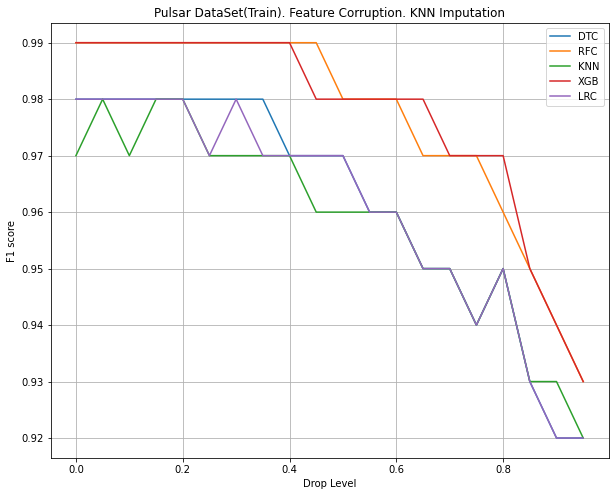

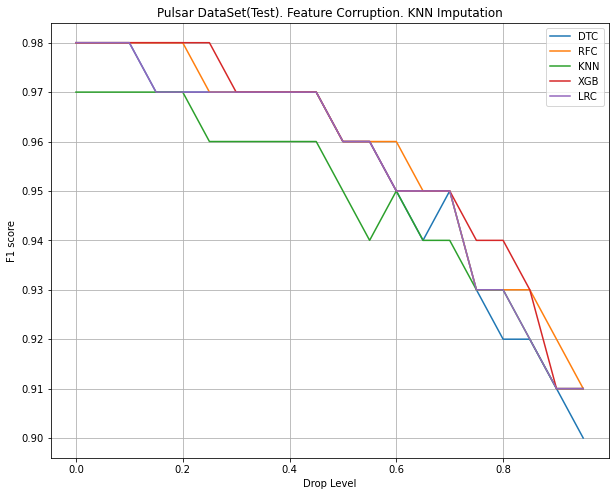

In [ ]:
plot_results(pulsar_train_knn, 'Pulsar', 'KNN', test = False)
plot_results(pulsar_test_knn, 'Pulsar', 'KNN', test = True)

In [ ]:
pulsar_train_extra, pulsar_test_extra = corupt_data(20, X, y, clfs, est = ExtraTreesRegressor())

0.0
[14:55:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.05
[14:55:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.97, 0.99, 0.98], [0.97, 0.98, 0.97, 0.98, 0.98])
0.1
[14:55:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.98, 0.99, 0.98], [0.98, 0.98, 0.97, 0.98, 0.98])
0.15
[14:55:35] WARNING: ../src/lear

In [ ]:

pd.DataFrame(pulsar_train_extra).to_csv('PulsarF1TrainScoresExtra.csv', index = False)
pd.DataFrame(pulsar_test_extra).to_csv('PulsarF1TestScoresExtra.csv', index = False)

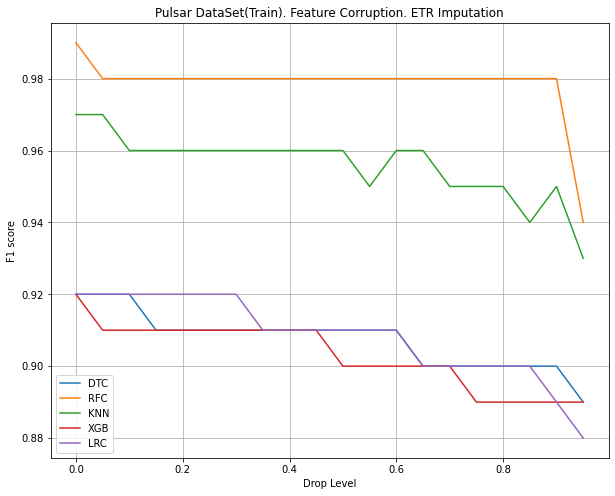

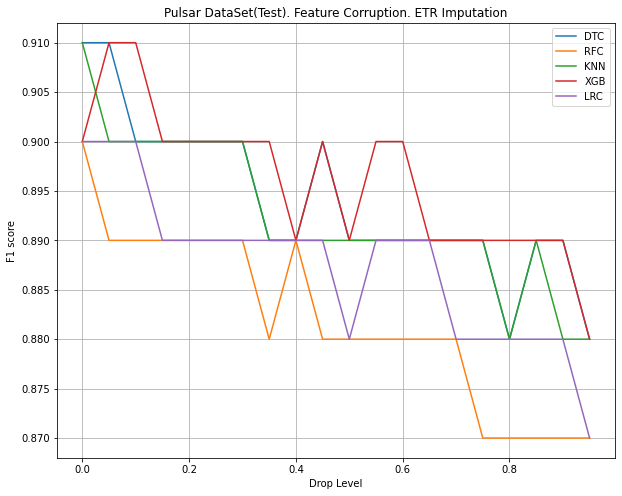

In [ ]:
plot_results(pulsar_train_extra, 'Pulsar', 'ETR', test = False)
plot_results(pulsar_test_extra, 'Pulsar', 'ETR', test = True)

In [ ]:
def corupt_important_features(n, X, y, important, clfs, est):
    Train_Scores = []
    Test_Scores = []
    features = [i for i in range(X.shape[0])]
    not_important = [i  for i in features if i not in important] 

    for i in range(n):
        level = i/n
        print(level)
        D = X.copy()
        imp = IterativeImputer(estimator = est, max_iter=3, random_state=0)
        mask = np.random.binomial(1, level, size=(D.shape[0],D.shape[1]))
        mask[:, not_important] = 0
        mask = mask.astype(bool)
        D[mask] = np.nan
        X_train, X_test, y_train, y_test = train_test_split(
             D, y, test_size=0.7, random_state=0)
    
        imp.fit(X_train)
        X_train = imp.transform(X_train)
        X_test = imp.transform(X_test)
    
        scores = Scores(clfs, X_train, X_test, y_train, y_test)
        print(scores)
    
        Train_Scores.append(scores[0])
        Test_Scores.append(scores[1])
        
    return (Train_Scores, Test_Scores)
important_pulsar = [2,3]
important_stellar = [-3]
important_rice = [1,3,4,-1]
important_bank = [1,3,4,-1]

In [ ]:
pulsar_train_imp, pulsar_test_imp = corupt_important_features(20, X, y, important = imp_pulsar, clfs, est = None)

In [ ]:
pulsar_train_imp_forest, pulsar_test_imp_forest = corupt_important_features(20, X, y, important = imp_pulsar, clfs, est = DecisionTreeRegressor())

In [ ]:
pulsar_train_imp_knn, pulsar_test_imp_knn = corupt_important_features(20, X, y, important = imp_pulsar, clfs, est = KNeighborsRegressor())

In [ ]:
pulsar_train_imp_extra, pulsar_test_imp_extra = corupt_important_features(20, X, y, important = imp_pulsar, clfs, est = ExtraTreesRegressor())

In [ ]:
X = pd.read_csv('Rice_features.csv', index_col= 0)
y = pd.read_csv('Rice_labels.csv', index_col = 0)


tree = DecisionTreeClassifier(random_state=0, max_depth = 5)
forst = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth= 5,  n_estimators = 30, max_features = 5)
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
xgvClf = xgb.XGBClassifier(random_state=0,  max_depth = 5, n_estimators=30)
logReg = LogisticRegression(random_state=0, C=1, n_jobs = -1)

clfs = [tree,
        forst, 
        knn,
        xgvClf,
        logReg
       ]
rice_train, rice_test = corupt_data(20, X, y, clfs, est = None)

0.0
[14:57:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.98, 1.0, 1.0])
0.05
[14:57:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.1
[14:57:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.97, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.15
[14:57:20] WARNING: ../src/learner.cc:1115: Starting in

In [ ]:
pd.DataFrame(rice_train).to_csv('RiceF1TrainScores.csv', index = False)
pd.DataFrame(rice_test).to_csv('RiceF1TestScores.csv', index = False)

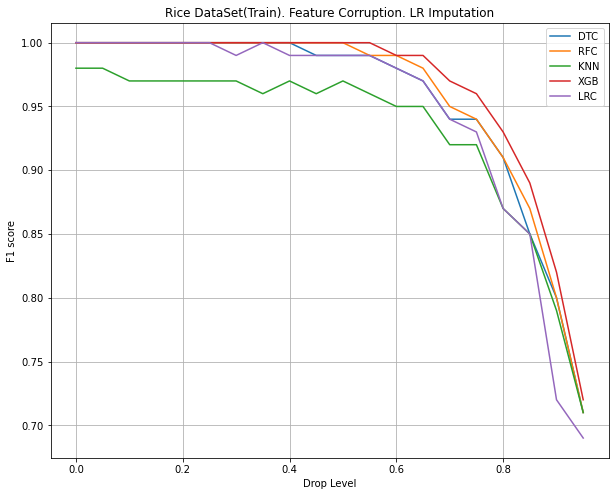

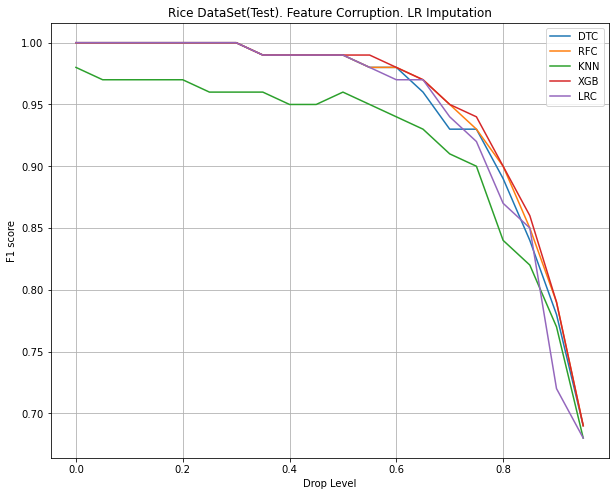

In [ ]:
plot_results(rice_train, 'Rice', 'LR', test = False)
plot_results(rice_test, 'Rice', 'LR', test = True)

In [ ]:
rice_train_forest, rice_test_forest = corupt_data(20, X, y, clfs, est = DecisionTreeRegressor())

0.0
[14:57:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.98, 1.0, 1.0])
0.05
[14:57:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.1
[14:57:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.15
[14:57:40] WARNING: ../src/learner.cc:1115: Starting in

/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[14:57:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.97, 1.0, 0.99], [0.99, 0.99, 0.97, 0.99, 0.99])
0.35
[14:57:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 0.99], [0.99, 0.99, 0.97, 0.99, 0.99])
0.4
[14:57:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.99, 0.99, 0.97, 1.0, 0.99], [0.99, 0.99, 0.97, 0.99, 0.99])
0.45


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[14:57:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.99, 0.99, 0.97, 1.0, 0.99], [0.99, 0.99, 0.97, 0.99, 0.99])
0.5


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[14:57:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.99, 0.99, 0.97, 1.0, 0.99], [0.98, 0.99, 0.96, 0.99, 0.99])
0.55
[14:57:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.98, 0.96, 0.99, 0.98], [0.98, 0.98, 0.96, 0.98, 0.98])
0.6
[14:57:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.98, 0.96, 0.99, 0.97], [0.97, 0.97, 0.95, 0.97, 0.97])
0.65
[14:57:53] WARNING: ../src/learner.c

/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[14:57:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.85, 0.86, 0.84, 0.87, 0.84], [0.84, 0.84, 0.81, 0.84, 0.83])
0.9
[14:57:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.77, 0.77, 0.79, 0.79, 0.7], [0.76, 0.77, 0.76, 0.77, 0.71])
0.95
[14:57:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.68, 0.69, 0.69, 0.7, 0.66], [0.67, 0.68, 0.67, 0.68, 0.65])


In [ ]:
pd.DataFrame(rice_train_forest).to_csv('RiceF1TrainScoresDT.csv', index = False)
pd.DataFrame(rice_train_forest).to_csv('RiceF1TestScoresDT.csv', index = False)

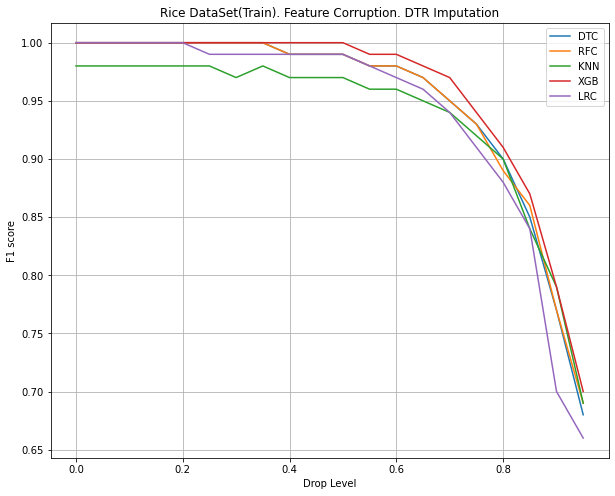

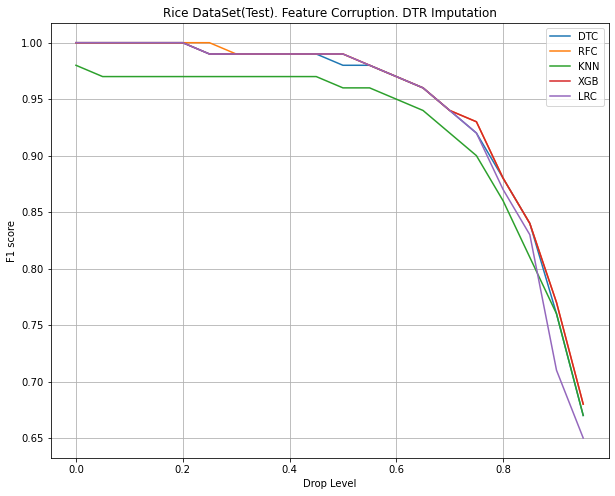

In [ ]:
plot_results(rice_train_forest, 'Rice', 'DTR', test = False)
plot_results(rice_test_forest, 'Rice', 'DTR', test = True)

In [ ]:
rice_train_knn, rice_test_knn = corupt_data(20, X, y, clfs, est = KNeighborsRegressor())

0.0
[14:58:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.98, 1.0, 1.0])
0.05
[14:58:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.98, 1.0, 1.0])
0.1
[14:58:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.97, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.15
[14:58:03] WARNING: ../src/learner.cc:1115: Starting in

In [ ]:
pd.DataFrame(rice_train_knn).to_csv('RiceF1TrainScoresKNN.csv', index = False)
pd.DataFrame(rice_test_knn).to_csv('RiceF1TestScoresKNN.csv', index = False)

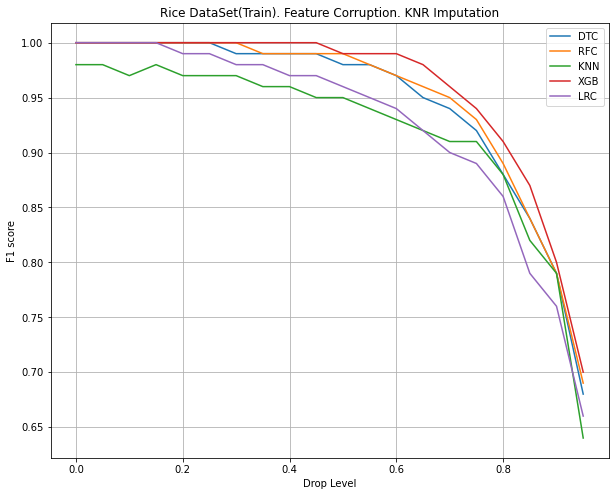

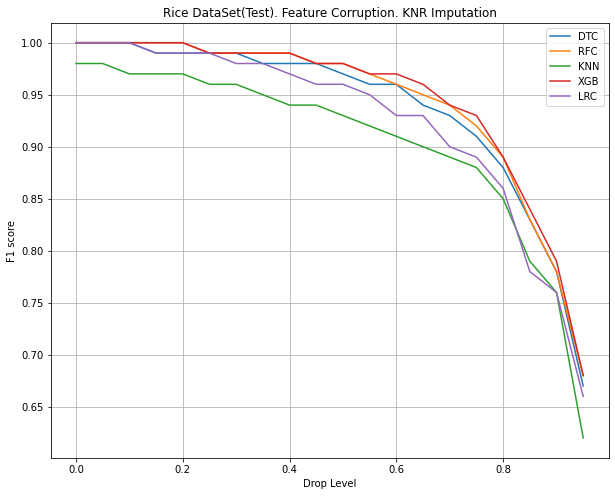

In [ ]:
plot_results(rice_train_knn, 'Rice', 'KNR', test = False)
plot_results(rice_test_knn, 'Rice', 'KNR', test = True)

In [ ]:
rice_train_extra, rice_test_extra = corupt_data(20, X, y, clfs, est = ExtraTreesRegressor())

0.0
[14:58:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.98, 1.0, 1.0])
0.05
[14:59:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.1
[14:59:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([1.0, 1.0, 0.98, 1.0, 1.0], [1.0, 1.0, 0.97, 1.0, 1.0])
0.15
[15:00:08] WARNING: ../src/learner.cc:1115: Starting in

In [ ]:
pd.DataFrame(rice_train_extra).to_csv('RiceF1TrainScoresExtra.csv', index = False)
pd.DataFrame(rice_test_extra).to_csv('RiceF1TestScoresExtra.csv', index = False)

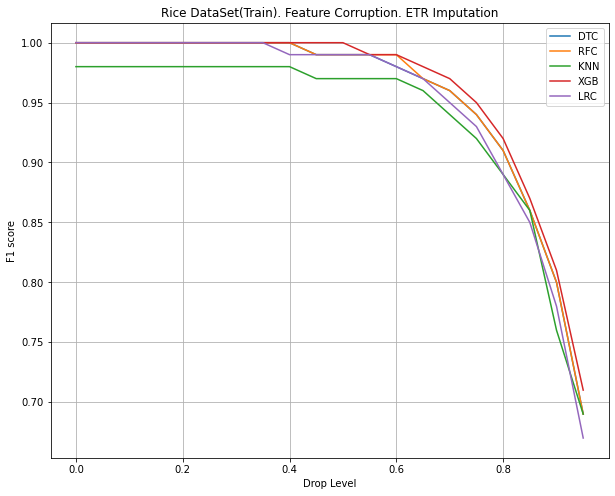

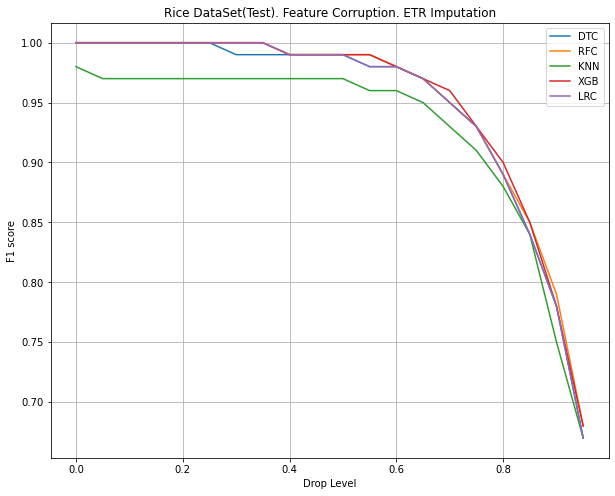

In [ ]:
plot_results(rice_train_extra, 'Rice', 'ETR', test = False)
plot_results(rice_test_extra, 'Rice', 'ETR', test = True)

In [ ]:
X = pd.read_csv('stellar_features.csv', index_col = 0)
y = pd.read_csv('stellar_labels.csv', index_col = 0)

tree = DecisionTreeClassifier(random_state=0, max_depth = 9)
forst = RandomForestClassifier(random_state=0, max_depth= 14,  n_estimators = 90)
knn = KNeighborsClassifier(n_neighbors = 3)
xgvClf = xgb.XGBClassifier(random_state=0, learning_rate=0.1, max_depth = 12, n_estimators=100)
logReg = LogisticRegression(random_state=0, C=2010)

clfs = [tree,
        forst, 
        knn,
        xgvClf,
        logReg
       ]

stellar_train_lr, stellar_test_lr = corupt_data(20, X, y, clfs, est = None)

0.0
[15:05:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.96, 1.0, 0.96], [0.97, 0.97, 0.94, 0.98, 0.96])
0.05
[15:05:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.97, 0.99, 0.95, 1.0, 0.89], [0.95, 0.96, 0.92, 0.96, 0.9])
0.1
[15:05:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.96, 0.99, 0.94, 1.0, 0.86], [0.93, 0.95, 0.91, 0.95, 0.86])
0.15
[15:05:25] WARNING: ../src/learn

In [ ]:
pd.DataFrame(stellar_train_lr).to_csv('StellarF1TrainScores.csv', index = False)
pd.DataFrame(stellar_test_lr).to_csv('StellarF1TestScores.csv', index = False)

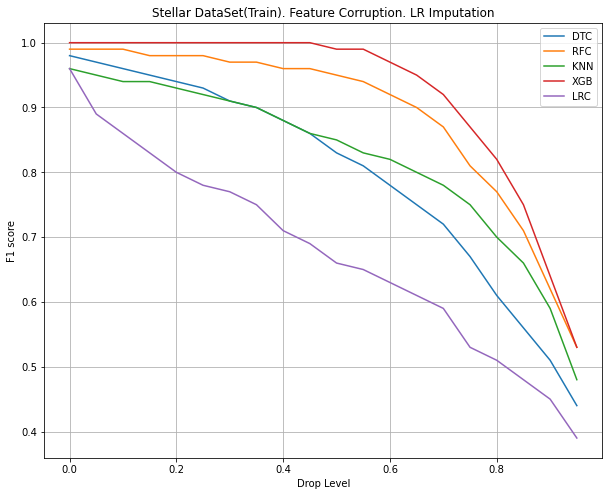

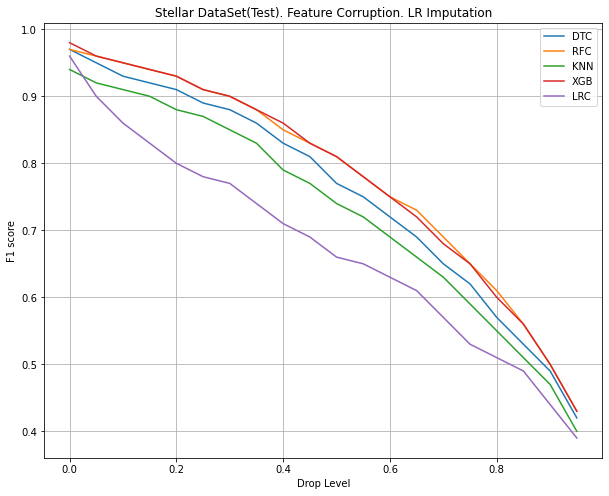

In [ ]:
plot_results(stellar_train_lr, 'Stellar', 'LR', test = False)
plot_results(stellar_test_lr, 'Stellar', 'LR', test = True)

In [ ]:
stellar_train_dt, stellar_test_dt = corupt_data(20, X, y, clfs, est = DecisionTreeRegressor())

0.0
[15:07:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.96, 1.0, 0.96], [0.97, 0.97, 0.94, 0.98, 0.96])
0.05
[15:08:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.95, 1.0, 0.92], [0.95, 0.96, 0.93, 0.96, 0.92])
0.1
[15:08:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.96, 0.98, 0.95, 1.0, 0.88], [0.94, 0.95, 0.91, 0.95, 0.89])
0.15
[15:08:25] WARNING: ../src/lear

/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[15:09:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.9, 0.95, 0.89, 1.0, 0.76], [0.86, 0.87, 0.83, 0.87, 0.76])
0.4
[15:09:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

([0.87, 0.94, 0.87, 0.99, 0.73], [0.83, 0.85, 0.8, 0.84, 0.73])
0.45
[15:09:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.85, 0.93, 0.86, 0.99, 0.71], [0.8, 0.82, 0.77, 0.82, 0.71])
0.5


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[15:09:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.83, 0.92, 0.84, 0.98, 0.68], [0.78, 0.8, 0.74, 0.8, 0.69])
0.55


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[15:09:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.8, 0.92, 0.82, 0.97, 0.66], [0.74, 0.77, 0.7, 0.76, 0.66])
0.6


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[15:09:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

([0.77, 0.9, 0.8, 0.96, 0.63], [0.7, 0.73, 0.66, 0.73, 0.63])
0.65
[15:10:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.73, 0.88, 0.77, 0.94, 0.61], [0.66, 0.69, 0.62, 0.68, 0.6])
0.7
[15:10:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.69, 0.86, 0.75, 0.91, 0.57], [0.63, 0.65, 0.59, 0.64, 0.58])
0.75
[15:10:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.65, 0.83, 0.71, 0.86, 0.55], [0.

In [ ]:
pd.DataFrame(stellar_train_dt).to_csv('StellarF1TrainScoresDT.csv', index = False)
pd.DataFrame(stellar_test_dt).to_csv('StellarF1TestScoresDT.csv', index = False)

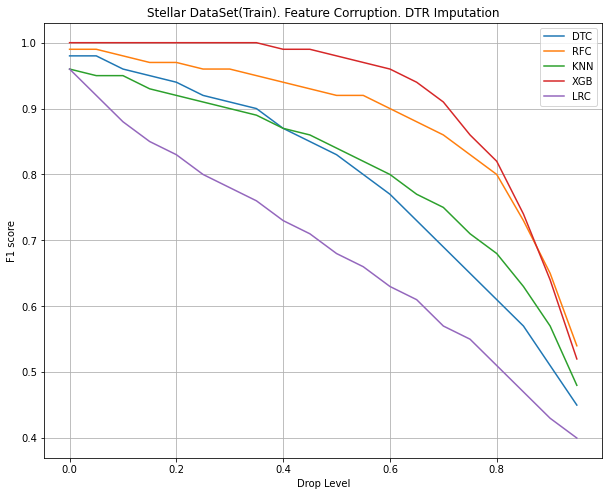

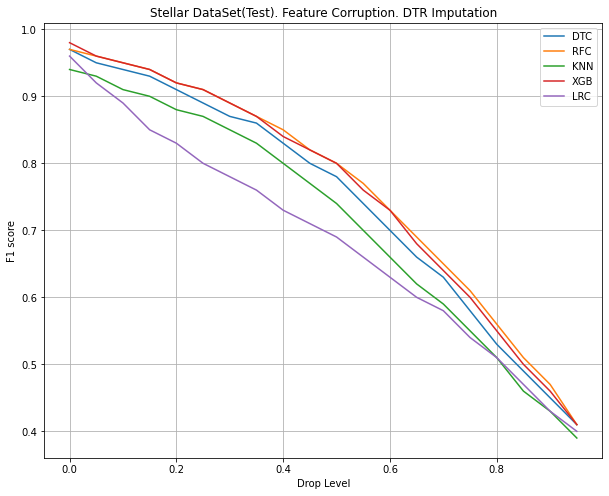

In [ ]:
plot_results(stellar_train_dt, 'Stellar', 'DTR', test = False)
plot_results(stellar_test_dt, 'Stellar', 'DTR', test = True)

In [ ]:

stellar_train_knn, stellar_test_knn = corupt_data(20, X, y, clfs, est = KNeighborsRegressor())

0.0
[15:10:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.96, 1.0, 0.96], [0.97, 0.97, 0.94, 0.98, 0.96])
0.05
[15:11:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.97, 0.99, 0.95, 1.0, 0.91], [0.96, 0.96, 0.93, 0.96, 0.92])
0.1
[15:11:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.96, 0.98, 0.94, 1.0, 0.89], [0.94, 0.95, 0.92, 0.95, 0.89])
0.15
[15:11:24] WARNING: ../src/lear

In [ ]:
pd.DataFrame(stellar_train_knn).to_csv('StellarF1TrainScoresKNN.csv', index = False)
pd.DataFrame(stellar_test_knn).to_csv('StellarF1TestScoresKNN.csv', index = False)

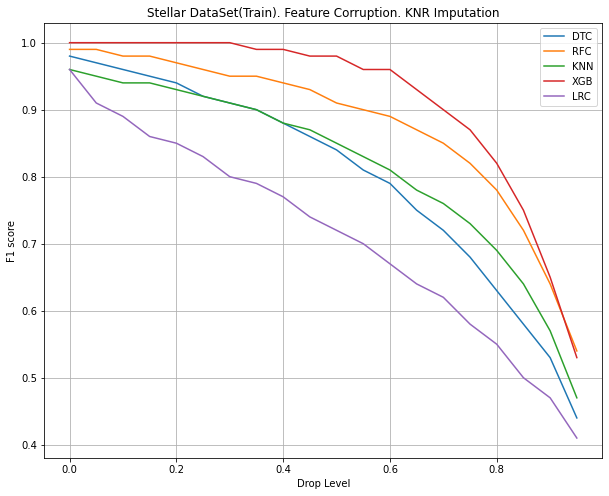

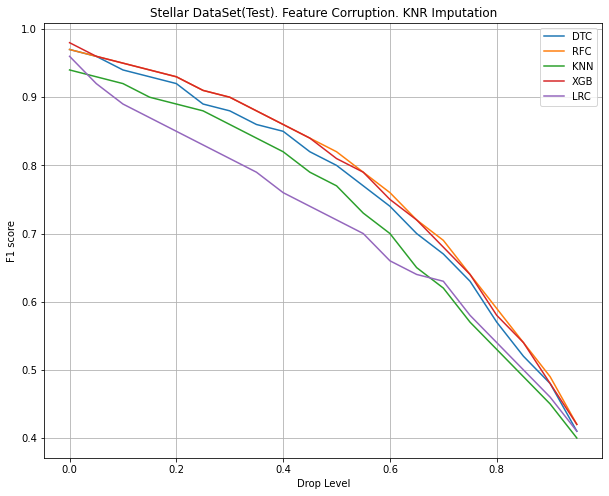

In [ ]:
plot_results(stellar_train_knn, 'Stellar', 'KNR', test = False)
plot_results(stellar_test_knn, 'Stellar', 'KNR', test = True)

In [ ]:
stellar_train_extra, stellar_test_extra = corupt_data(20, X, y, clfs, est = ExtraTreesRegressor())

0.0
[15:16:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.98, 0.99, 0.96, 1.0, 0.96], [0.97, 0.97, 0.94, 0.98, 0.96])
0.05
[15:17:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.97, 0.99, 0.96, 1.0, 0.91], [0.95, 0.96, 0.93, 0.96, 0.91])
0.1
[15:18:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
([0.96, 0.98, 0.95, 1.0, 0.89], [0.94, 0.95, 0.92, 0.95, 0.89])
0.15
[15:19:20] WARNING: ../src/lear

In [ ]:
pd.DataFrame(stellar_train_extra).to_csv('StellarF1TrainScoresExtra.csv', index = False)
pd.DataFrame(stellar_test_extra).to_csv('StellarF1TestScoresExtra.csv', index = False)

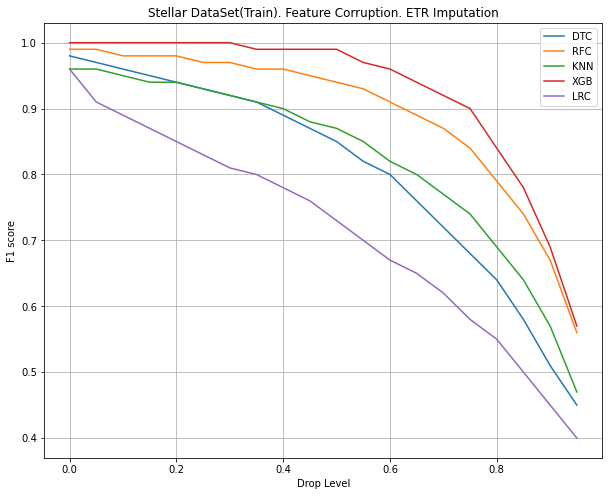

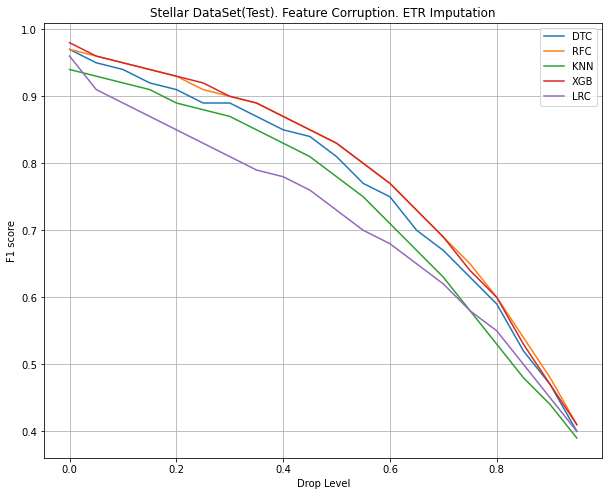

In [ ]:
plot_results(stellar_train_extra, 'Stellar', 'ETR', test = False)
plot_results(stellar_test_extra, 'Stellar', 'ETR', test = True)

In [ ]:

X = pd.read_csv('bank_data_features.csv')
y = pd.read_csv('bank_data_labels.csv')

dtc = DecisionTreeClassifier(max_depth=4)
rfc = RandomForestClassifier(n_estimators=5)
xgb_с = xgb.XGBClassifier()
knc = KNeighborsClassifier()
lr = LogisticRegression()

clfs = [dtc,
        rfc,
        xgb_c,
        knc,
        lr
       ]

bank_train, bank_test = corupt_data(20, X, y, clfs, est = None)

0.0
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:33:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.97, 0.92, 0.91], [0.91, 0.89, 0.91, 0.9, 0.9])
0.05
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.4s
[15:33:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.5s
([0.91, 0.99, 0.97, 0.92, 0.91], [0.9, 0.9, 0.91, 0.9, 0.9])
0.1
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.5s
[15:

([0.89, 0.98, 0.98, 0.9, 0.89], [0.89, 0.87, 0.89, 0.88, 0.89])
0.9
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   1.4s
[15:36:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.9s
([0.89, 0.98, 0.98, 0.89, 0.89], [0.89, 0.87, 0.89, 0.88, 0.89])
0.95
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   1.4s
[15:36:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.9s
([0.89, 0.95, 0.96, 0.89, 0.89], [0.89, 0.86, 0.88, 0.88, 0.89])


In [ ]:

pd.DataFrame(bank_train).to_csv('BankF1TrainScoresLR.csv', index = False)
pd.DataFrame(bank_test).to_csv('BankF1TestScoresLR.csv', index = False)

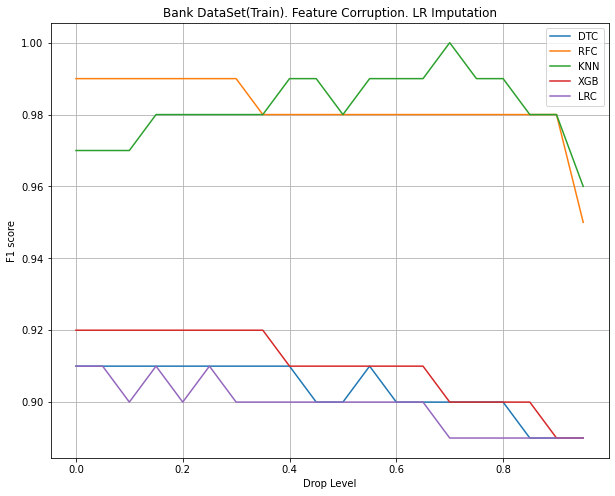

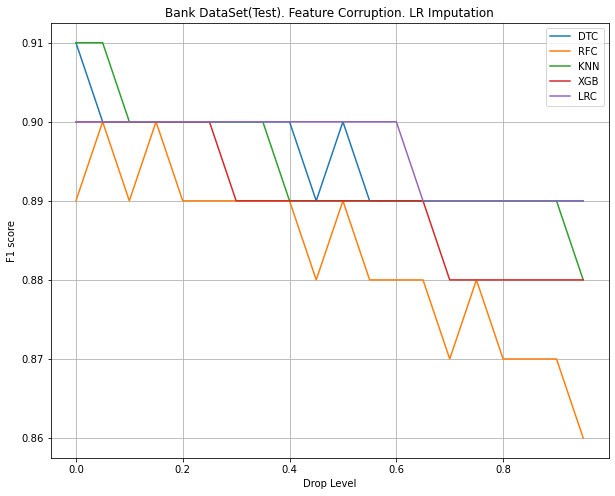

In [ ]:
plot_results(bank_train, 'Bank', 'LR', test = False)
plot_results(bank_test, 'Bank', 'LR', test = True)

In [ ]:
bank_train_forest, bank_test_forest = corupt_data(20, X, y, clfs, est = DecisionTreeRegressor())

0.0
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:36:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.97, 0.92, 0.91], [0.91, 0.89, 0.91, 0.9, 0.9])
0.05
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:36:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.96, 0.92, 0.9], [0.9, 0.89, 0.9, 0.9, 0.9])
0.1
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:3

([0.89, 0.95, 0.92, 0.89, 0.89], [0.89, 0.86, 0.88, 0.88, 0.89])
0.9
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:39:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.89, 0.93, 0.91, 0.89, 0.89], [0.89, 0.86, 0.88, 0.88, 0.89])
0.95
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.5s
([0.89, 0.91, 0.9, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])


In [ ]:
pd.DataFrame(bank_train_forest).to_csv('BankF1TrainScoresDT.csv', index = False)
pd.DataFrame(bank_train_forest).to_csv('BankF1TestScoresDT.csv', index = False)

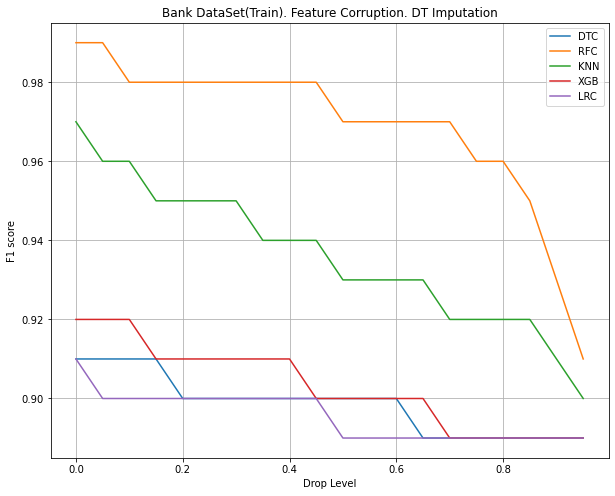

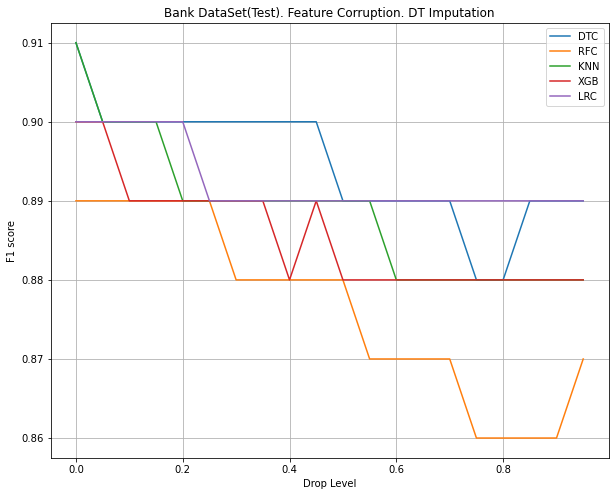

In [ ]:
plot_results(bank_train_forest, 'Bank', 'DT', test = False)
plot_results(bank_test_forest, 'Bank', 'DT', test = True)

In [ ]:
bank_train_knn, bank_test_knn = corupt_data(20, X, y, clfs,est = KNeighborsRegressor())

0.0
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:39:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.97, 0.92, 0.91], [0.91, 0.89, 0.91, 0.9, 0.9])
0.05
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:40:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.97, 0.92, 0.9], [0.9, 0.9, 0.9, 0.9, 0.9])
0.1
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[15:41

([0.89, 0.97, 0.93, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])
0.9
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.4s
[16:28:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.89, 0.94, 0.91, 0.89, 0.89], [0.89, 0.86, 0.88, 0.88, 0.89])
0.95
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[16:28:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.5s
([0.89, 0.91, 0.9, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])


In [ ]:
pd.DataFrame(bank_train_knn).to_csv('BankF1TrainScoresKNN.csv', index = False)
pd.DataFrame(bank_test_knn).to_csv('BankF1TestScoresKNN.csv', index = False)

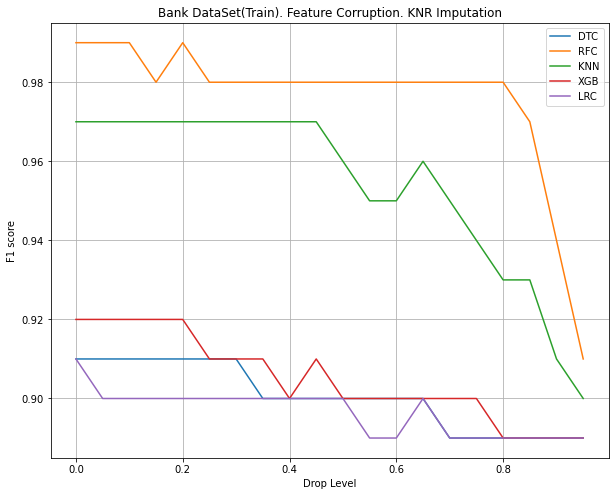

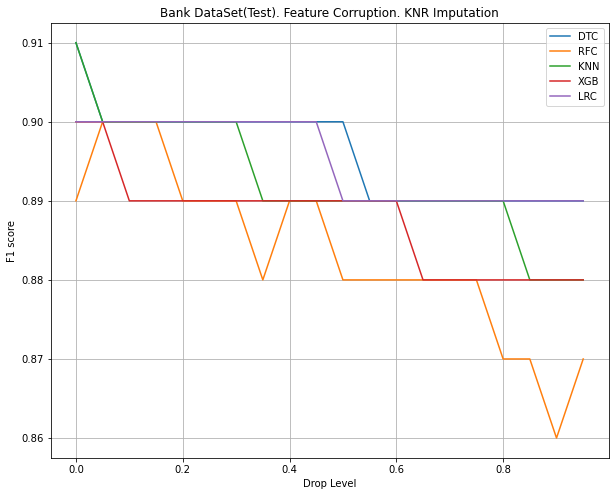

In [ ]:
plot_results(bank_train_knn, 'Bank', 'KNR', test = False)
plot_results(bank_test_knn, 'Bank', 'KNR', test = True)

In [ ]:
bank_train_extra, bank_test_extra = corupt_data(20, X, y, clfs, est = ExtraTreesRegressor())

0.0
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[16:29:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.99, 0.97, 0.92, 0.91], [0.91, 0.9, 0.91, 0.9, 0.9])
0.05
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[16:33:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.4s
([0.91, 0.98, 0.97, 0.92, 0.91], [0.9, 0.89, 0.9, 0.9, 0.9])
0.1
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.3s
[16:3

([0.89, 0.98, 0.95, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])
0.9
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.5s
[17:12:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.5s
([0.89, 0.98, 0.95, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])
0.95
[Pipeline] . (step 1 of 2) Processing feature_selection, total=   0.6s
[17:13:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=   0.5s
([0.89, 0.94, 0.93, 0.89, 0.89], [0.89, 0.87, 0.88, 0.88, 0.89])


In [ ]:
pd.DataFrame(bank_train_extra).to_csv('BankF1TrainScoresExtra.csv', index = False)
pd.DataFrame(bank_test_extra).to_csv('BankF1TestScoresExtra.csv', index = False)

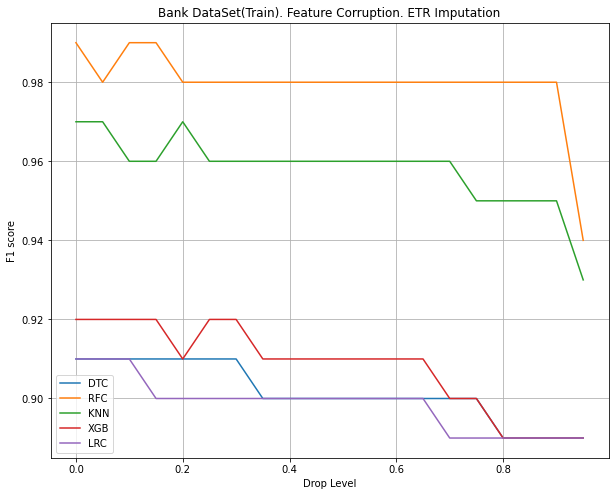

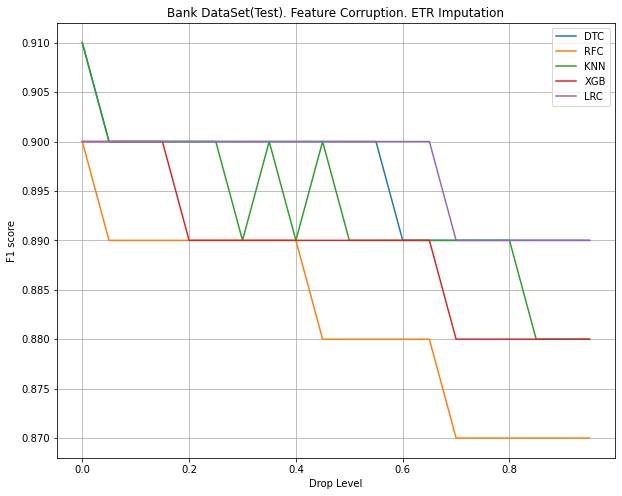

In [ ]:
plot_results(bank_train_extra, 'Bank', 'ETR', test = False)
plot_results(bank_test_extra, 'Bank', 'ETR', test = True)

In [ ]:
def plot_all_results(result_lr, result_dt, result_knn, result_extra, dataset, test = True):
    plt.figure(figsize=(10,8))
    imps = ['LR', 'RFR', 'KNR', 'ETR']
    styles = ['-', '--', ':', '-.']
    for result, imp, st in zip([result_lr, result_dt, result_knn, result_extra], imps,styles):
        plt.plot([i/20 for i in range(20)], np.array(result)[:,0], color = 'b', 
                 linestyle = st, label = 'DTC, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,1], color = 'y', 
                 linestyle = st, label = 'RFC, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,2], color = 'g', 
                 linestyle = st, label = 'KNN, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,3], color = 'r',
                 linestyle = st, label = 'XGB, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,4], color = 'm', 
                 linestyle = st, label = 'LRC, {} Imputation'.format(imp))
    if test:
        plt.title('{} DataSet(Test). Features Corruption'.format(dataset))
    else:
        plt.title('{} DataSet(Train). Features Corruption'.format(dataset))
    plt.xlabel('Drop Level')
    plt.ylabel('F1 score')
    plt.grid()
    plt.legend()
    


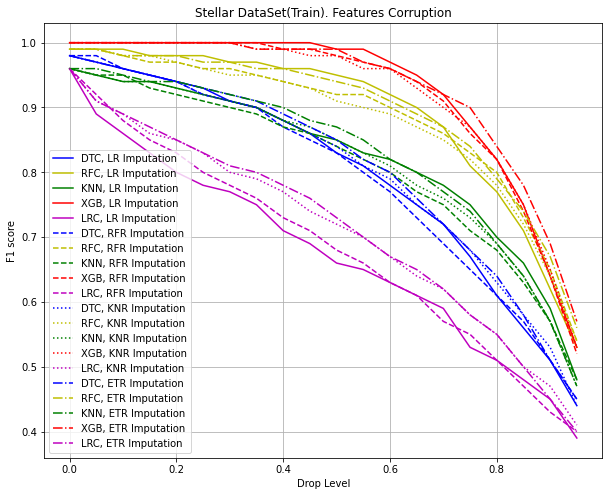

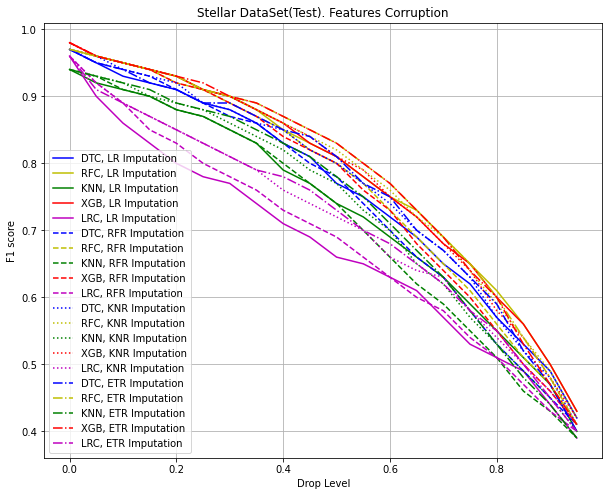

In [ ]:

# plot_all_results([[stellar_train_lr[i][0],stellar_train_lr[i][-1]] for i in range(20)],
#                  [[stellar_train_dt[i][0],stellar_train_dt[i][-1]] for i in range(20)],
#                  [[stellar_train_knn[i][0],stellar_train_knn[i][-1]] for i in range(20)], 
#                  [[stellar_train_extra[i][0], stellar_train_extra[i][-1]] for i in range(20)], 
#                  'Stellar', test= False)

# plot_all_results([[stellar_test_lr[i][0],stellar_test_lr[i][-1]] for i in range(20)],
#                  [[stellar_test_dt[i][0],stellar_test_dt[i][-1]] for i in range(20)],
#                  [[stellar_test_knn[i][0],stellar_test_knn[i][-1]] for i in range(20)], 
#                  [[stellar_test_extra[i][0], stellar_test_extra[i][-1]] for i in range(20)], 
#                  'Stellar', test= False)
plot_all_results(stellar_train_lr, stellar_train_dt, stellar_train_knn, stellar_train_extra, 'Stellar', test= False)
plot_all_results(stellar_test_lr, stellar_test_dt, stellar_test_knn, stellar_test_extra, 'Stellar', test= True)

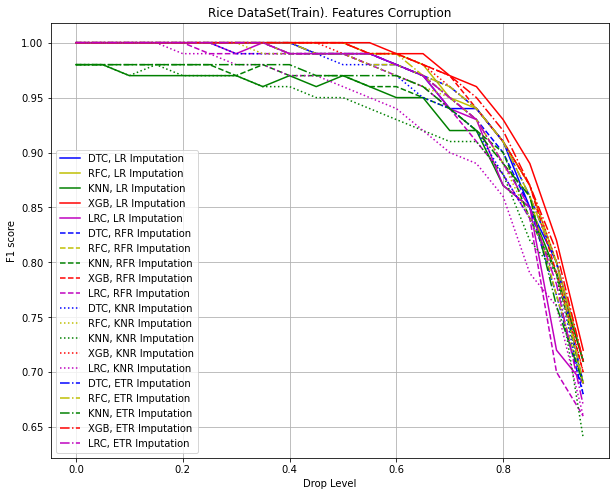

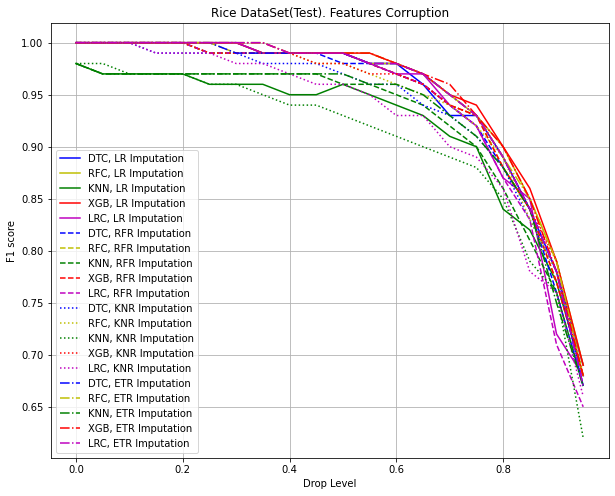

In [ ]:
plot_all_results(rice_train, rice_train_forest, rice_train_knn, rice_train_extra, 'Rice', test= False)
plot_all_results(rice_test, rice_test_forest, rice_test_knn, rice_test_extra, 'Rice', test= True)


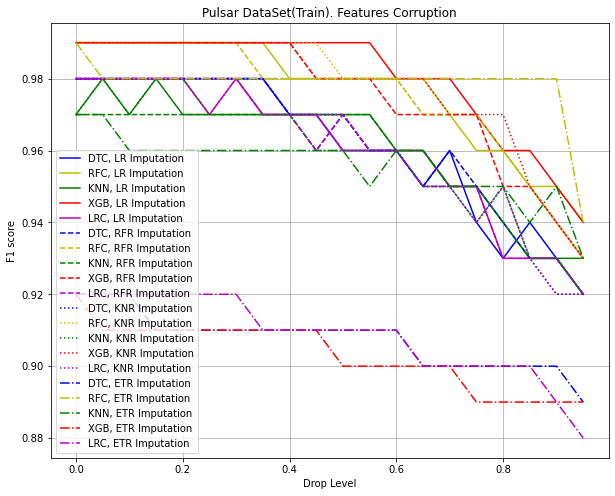

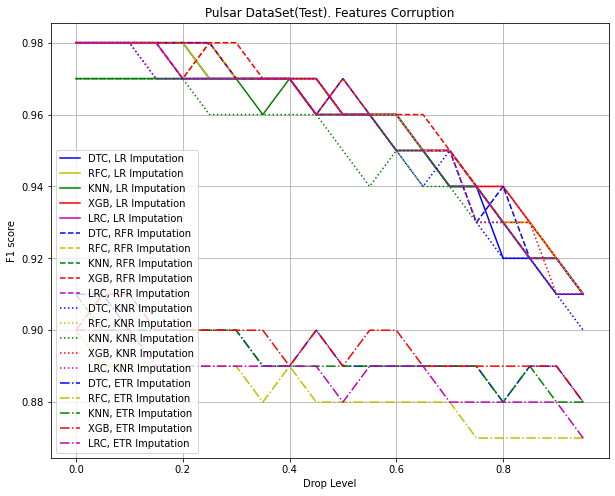

In [ ]:

plot_all_results(pulsar_train, pulsar_train_forest, pulsar_train_knn, pulsar_train_extra, 'Pulsar', test= False)
plot_all_results(pulsar_test, pulsar_test_forest, pulsar_test_knn, pulsar_test_extra, 'Pulsar', test= True)

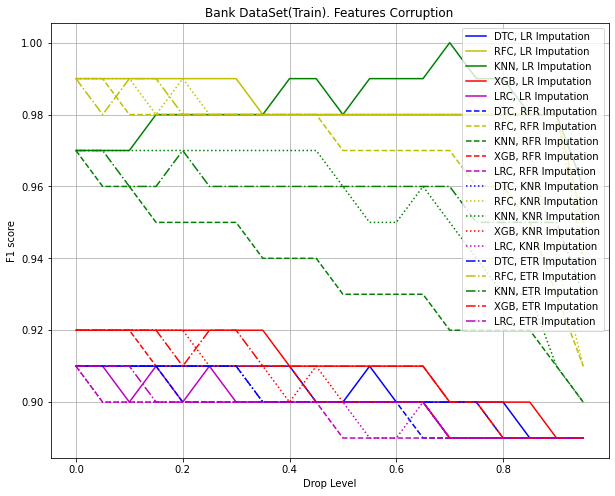

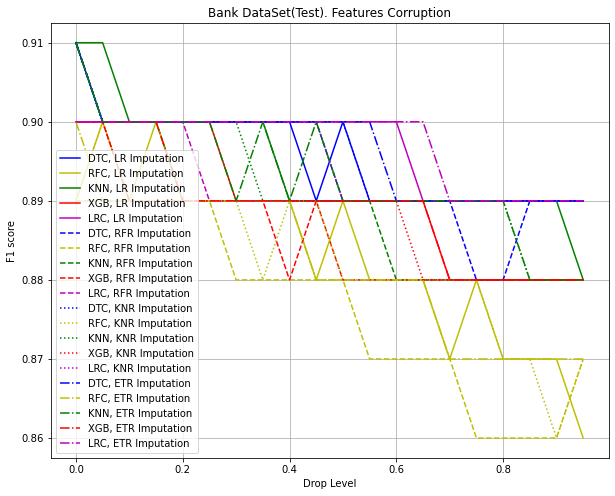

In [ ]:
plot_all_results(bank_train, bank_train_forest, bank_train_knn, bank_train_extra, 'Bank', test= False)
plot_all_results(bank_test, bank_test_forest, bank_test_knn, bank_test_extra, 'Bank', test= True)

In [ ]:
def calc_perf(scores_train, scores_test, n ):
    Performances_train = []
    Performances_test = []
    for i in scores_train:
        
        Performances_train.append(np.sum(i, axis = 0) * 1/n)
    
    for i in scores_test:

        Performances_test.append(np.sum(i, axis = 0) * 1/n)
    return Performances_train, Performances_test

scores_train_pulsar = [pulsar_train, pulsar_train_forest, pulsar_train_knn, pulsar_train_extra]
scores_test_pulsar = [pulsar_test, pulsar_test_forest, pulsar_test_knn, pulsar_test_extra]
perf_train_pulsar, perf_pulsar_test = calc_perf(scores_train_pulsar, scores_test_pulsar, 20)

In [ ]:
scores_train_stellar = [stellar_train_lr, stellar_train_dt, stellar_train_knn, stellar_train_extra]
scores_test_stellar = [stellar_test_lr, stellar_test_dt, stellar_test_knn, stellar_test_extra]
perf_train_stellar, perf_test_stellar = calc_perf(scores_train_stellar, scores_test_stellar, 20)

In [ ]:
scores_train_bank = [bank_train, bank_train_forest, bank_train_knn, bank_train_extra]
scores_test_bank = [bank_test, bank_test_forest, bank_test_knn, bank_test_extra]
perf_train_bank, perf_test_bank = calc_perf(scores_train_bank, scores_test_bank, 20)

In [ ]:
scores_train_rice = [rice_train, rice_train_forest, rice_train_knn, rice_train_extra]
scores_test_rice = [rice_test, rice_test_forest, rice_test_knn, rice_test_extra]
perf_train_rice, perf_test_rice = calc_perf(scores_train_rice, scores_test_rice, 20)

In [ ]:
perf_pulsar_test#perf_pulsar_test

[array([0.9555, 0.958 , 0.953 , 0.959 , 0.956 ]),
 array([0.958 , 0.957 , 0.954 , 0.959 , 0.9565]),
 array([0.9535, 0.9575, 0.9485, 0.958 , 0.955 ]),
 array([0.947 , 0.95  , 0.9265, 0.9505, 0.948 ])]

In [ ]:
perf_test_bank

[array([0.8955, 0.883 , 0.8945, 0.89  , 0.8965]),
 array([0.8945, 0.8765, 0.8885, 0.8855, 0.8925]),
 array([0.896 , 0.8835, 0.8925, 0.8875, 0.895 ]),
 array([0.8965, 0.882 , 0.893 , 0.889 , 0.897 ])]

In [ ]:
perf_test_rice

[array([0.947 , 0.95  , 0.917 , 0.9515, 0.943 ]),
 array([0.9425, 0.945 , 0.922 , 0.9445, 0.9385]),
 array([0.9365, 0.942 , 0.9035, 0.9445, 0.924 ]),
 array([0.947 , 0.95  , 0.9265, 0.9505, 0.948 ])]

In [ ]:
perf_test_stellar


[array([0.758 , 0.7815, 0.731 , 0.781 , 0.676 ]),
 array([0.746 , 0.764 , 0.7165, 0.7605, 0.687 ]),
 array([0.7655, 0.78  , 0.734 , 0.778 , 0.713 ]),
 array([0.767 , 0.7835, 0.7395, 0.783 , 0.7155])]

In [ ]:
def calc_stab(scores_train, scores_test, n ):
    Stability_train = []
    Stability_test = []
    for i in scores_train:
        Stability_train.append(np.sum(i, axis = 0)/np.array(i[0])/n)
    
    for i in scores_test:

        Stability_test.append(np.sum(i, axis = 0)/np.array(i[0])/n)
    return Stability_train, Stability_test
stab_train_stellar, stab_test_stellar = calc_stab(scores_train_stellar, scores_test_stellar, 20)
stab_train_rice, stab_test_rice = calc_stab(scores_train_rice, scores_test_rice, 20)
stab_train_bank, stab_test_bank = calc_stab(scores_train_bank, scores_test_bank, 20)
stab_train_pulsar, stab_test_pulsar = calc_stab(scores_train_pulsar, scores_test_pulsar, 20)


In [ ]:
labs = ['DTC', 'RFC', 'KNC', 'XGB', 'LRC']

([<matplotlib.axis.XTick at 0x7f6ad255d7c0>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

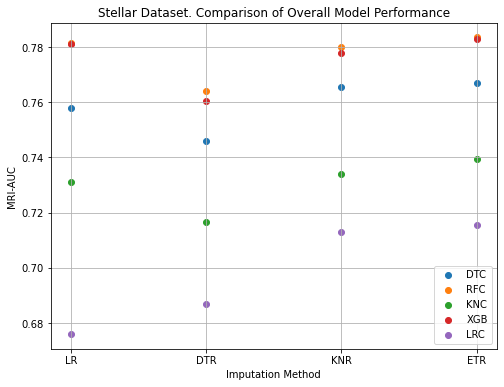

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(perf_test_stellar).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.grid()
plt.title('Stellar Dataset. Comparison of Overall Model Performance')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )

([<matplotlib.axis.XTick at 0x7f6b05706760>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

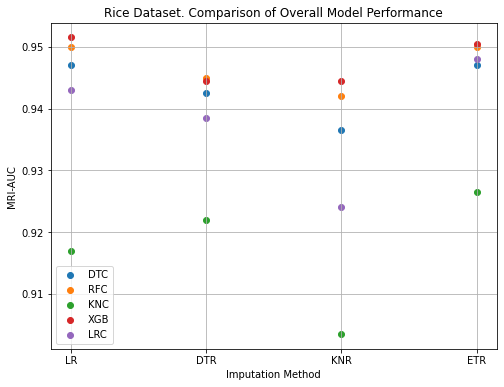

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(perf_test_rice).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.grid()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.title('Rice Dataset. Comparison of Overall Model Performance')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )

([<matplotlib.axis.XTick at 0x7f6ad25f45b0>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

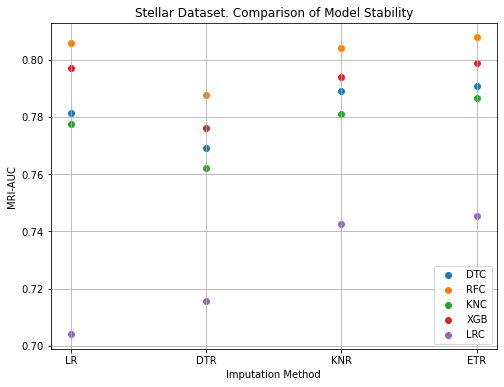

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(stab_test_stellar).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.grid()
# plt.ylim(0.945,0.96)
plt.title('Stellar Dataset. Comparison of Model Stability')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )

([<matplotlib.axis.XTick at 0x7f6ad293dca0>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

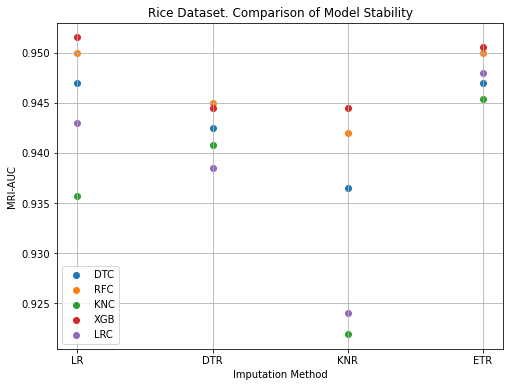

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(stab_test_rice).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.grid()
# plt.ylim(0.945,0.96)
plt.title('Rice Dataset. Comparison of Model Stability')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )